### Required imports

In [1]:
from math import exp
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import Image

### Set your student number as random seed

In [2]:
np.random.seed(400201167)

In [3]:
# Matplotlib settings
plt.style.use(['dark_background'])
plt.rc('axes', facecolor='k')
plt.rc('figure', facecolor='k')


# Gaussian Process

1. Generate 10 Gaussian processes with $\mu(t)=2t^2$ and rbf kernel: $e^{-(x_1-x_2)^2/{2\sigma^2}}$ with $\sigma^2$=0.05, in the interval [-2, 2].
2. Show the processes as well as $\mu(t)$ in a single plot. (set the number of samples as large as the graphs seem smooth)

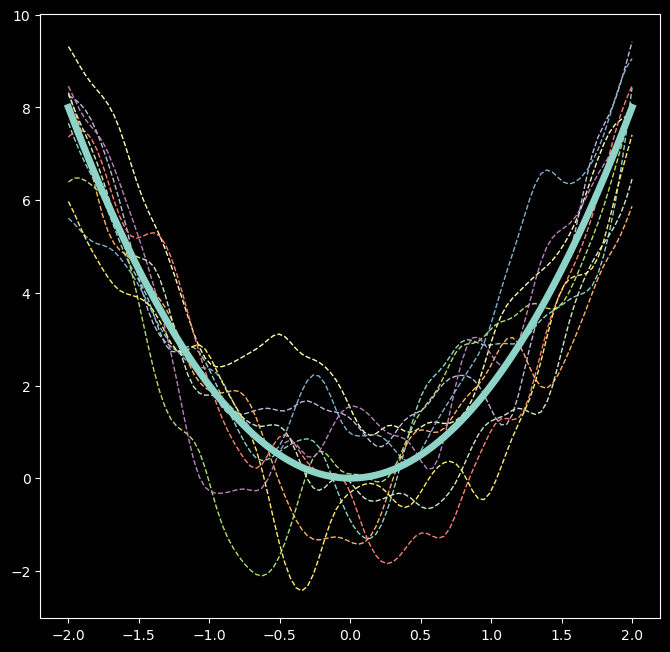

In [4]:
# params
dim = 100
sigma2 = 0.05
num_process = 10

# define covariane matrix
x1 = np.linspace(-2, 2, dim).reshape(-1, 1)
x2 = np.linspace(-2, 2, dim).reshape(-1, 1)
temp = np.repeat(x1 ** 2, dim, axis=1) + (x2.T ** 2) - 2 * x1 @ x2.T
cov_matrix = np.exp(-(temp ** 2) / (2 * sigma2))

# define mean
mean = 2 * np.linspace(-2, 2, dim) ** 2

# create gaussian processes
process = np.random.multivariate_normal(mean, cov_matrix, size=num_process)

# plot processes
plt.rc('figure', figsize=(8, 8), dpi=100)
x_axis = np.linspace(-2, 2, dim)
for i in range(num_process):
    plt.plot(x_axis, process[i, :], '--', linewidth=1)
plt.plot(x_axis, mean, linewidth=5)
plt.show()


# Brownian Motion

Brownian motion is a type of Gaussian process in which the change of its value through time completely random.  
A standard Brownian motion as a Gaussian process has zero mean, and kernel $k(s, t) = \min{(s, t)}$

1. Generate 10 Brownian motions in the interval [0, 1].
2. Draw the processes in a single plot with different colors.

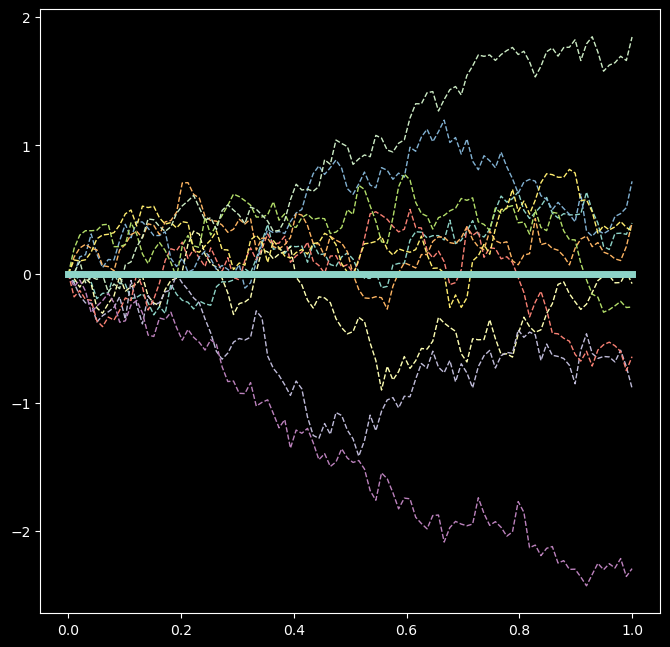

In [5]:
# params
dim = 100
num_process = 10

# define covariane matrix
x1 = np.repeat(np.linspace(0, 1, dim).reshape(-1, 1), dim, axis=1)
x2 = np.repeat(np.linspace(0, 1, dim).reshape(1, -1), dim, axis=0)
cov_matrix = np.minimum(x1, x2)

# define mean
mean = np.zeros(dim)

# # create gaussian processes
process = np.random.multivariate_normal(mean, cov_matrix, size=num_process)

# # plot processes
plt.rc('figure', figsize=(8, 8), dpi=100)
x_axis = np.linspace(0, 1, dim)
for i in range(num_process):
    plt.plot(x_axis, process[i, :], '--', linewidth=1)
plt.plot(x_axis, mean, linewidth=5)
plt.show()


### Shifting property

* One of the properties of Brownian motions is memorylessness (like poisson processes).
* They are also time and space homogenous which means change in value is independent of current time and value. 
* For any $t_1 < t_2$, the distribution of $X(t_2)-X(t_1)$ is independent of $t_1$ and $X(t)$ for $t \leq t_1$. This means starting from any point in a Brownian motion, what we observe afterwards is also a Brownian motion.
* To see this, extract the second half of all 10 processes and visualize them after translating their starting points to the center.

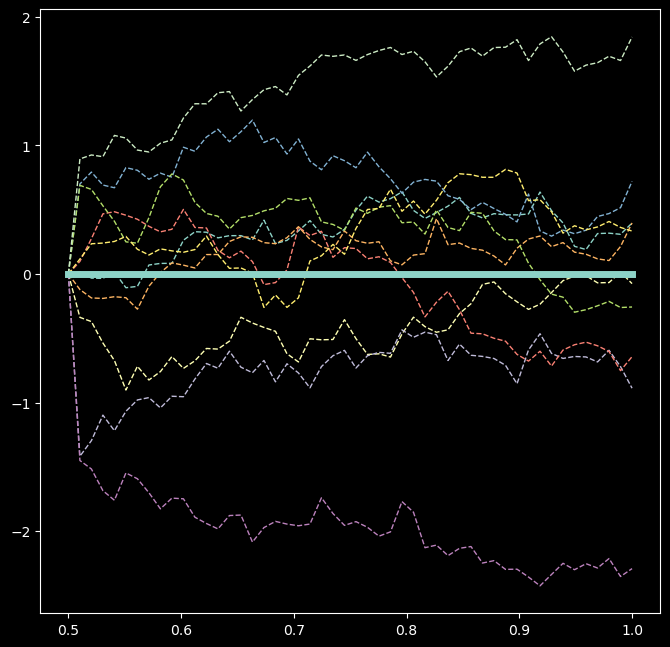

In [6]:
shifted_process = process[:, -dim//2:].copy()
shifted_process[:, -dim//2] = 0
shifted_mean = mean[-dim//2:]

# # plot processes
plt.rc('figure', figsize=(8, 8), dpi=100)
x_axis = np.linspace(0.5, 1, dim//2)
for i in range(num_process):
    plt.plot(x_axis, shifted_process[i, :], '--', linewidth=1)
plt.plot(x_axis, shifted_mean, linewidth=5)
plt.show()


### Scaling property

* Brownian motion has scaling property. It means that for if $B_t$ is a Brownian motion and $s > 0$, the process $\frac{1}{\sqrt{s}}B_{st}$ is also a Brownian motion. 
* Generate scaled Brownian process from the initially generated 10 processes with $s = 5$ and plot it. 

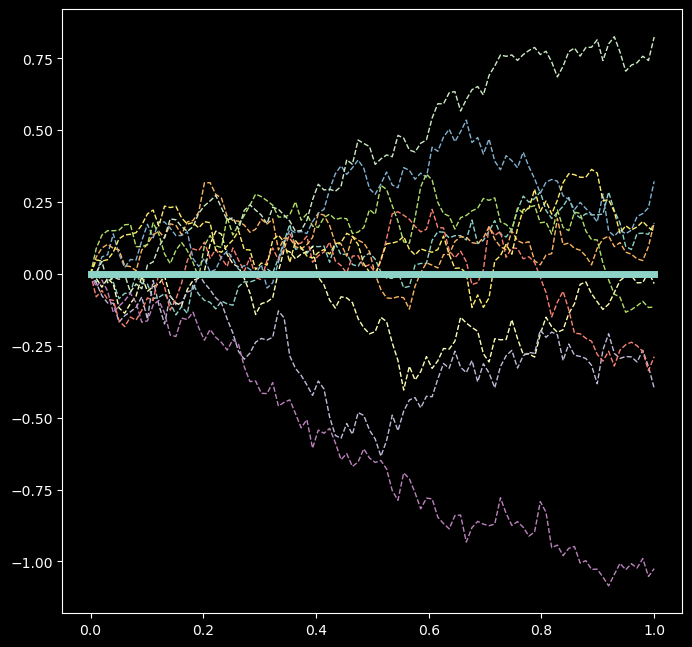

In [7]:
s = 5

scaled_process = process / math.sqrt(5)

# # plot processes
plt.rc('figure', figsize=(8, 8), dpi=100)
x_axis = np.linspace(0, 1, dim)
for i in range(num_process):
    plt.plot(x_axis, scaled_process[i, :], '--', linewidth=1)
plt.plot(x_axis, mean, linewidth=5)
plt.show()


### Inversion property

Brownian motions have inversion property, for both muliplication and addition:
1. Additive inversion: $B_{1-t} - B_1$ is also a Brownian motion.
2. Multiplicative inversion: $tB(\frac{1}{t}), t > 0$ is also a Brownian motion.

Plot inversed (both additive and multiplicative) of original 10 Brownian motions to observe this

In [8]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print(a[:, ::-1])

[[3 2 1]
 [6 5 4]]


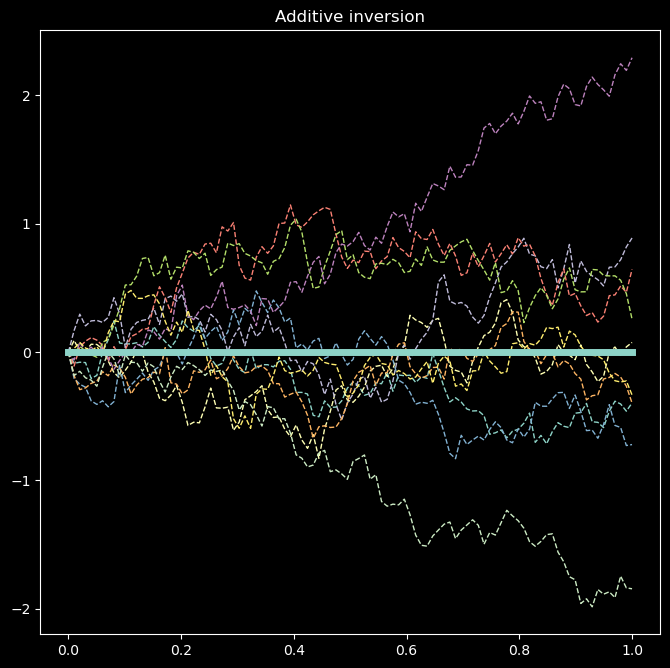

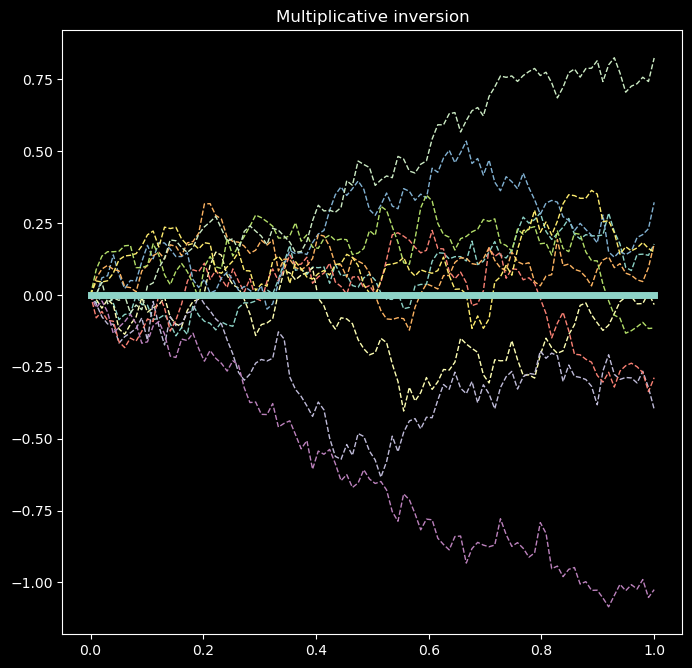

In [9]:
add_inverted = process[:, ::-1] - process[:, -1:]
# # plot processes
plt.rc('figure', figsize=(8, 8), dpi=100)
x_axis = np.linspace(0, 1, dim)
for i in range(num_process):
    plt.plot(x_axis, add_inverted[i, :], '--', linewidth=1)
plt.plot(x_axis, mean, linewidth=5)
plt.title('Additive inversion')
plt.show()


t = np.linspace(0, 1, dim)[1:]
mul_inverted = t * process[:, 1:][:, ::-1]
# # plot processes
xaxis = 1/t
plt.rc('figure', figsize=(8, 8), dpi=100)
for i in range(num_process):
    plt.plot(x_axis, scaled_process[i, :], '--', linewidth=1)
plt.plot(x_axis, mean, linewidth=5)
plt.title('Multiplicative inversion')
plt.show()


# Gaussian process with different kernels

Suppose all following processes are Gaussian with zero mean. Choose their corresponding kernel from the following options (one option is extra).

Write the results in a $3\times2$ numpy array and store it as 'gaussian_choice.npy', e.g. [[1, 2], [3, 4], [5, 7]]

1. $k_{w, a}(s, t) = \arcsin\left(\frac{w(s-a)(t-a)}{\sqrt{(w(s-a)(s-a)+1)(w(t-a)(t-a)+1)}}\right)$
2. $k(s, t) = \delta(s-t)$
3. $k_a(s, t) = (s-a)(t-a)$
4. $k(s, t) = \min(s, t)$
5. $k_{\sigma}(s, t) = e^{\frac{-(s-t)^2}{2\sigma^2}}$
6. $k(s, t) = \min(s, t) - st$
7. $k_l(s, t) = e^{-\frac{|s-t|}{l}}$



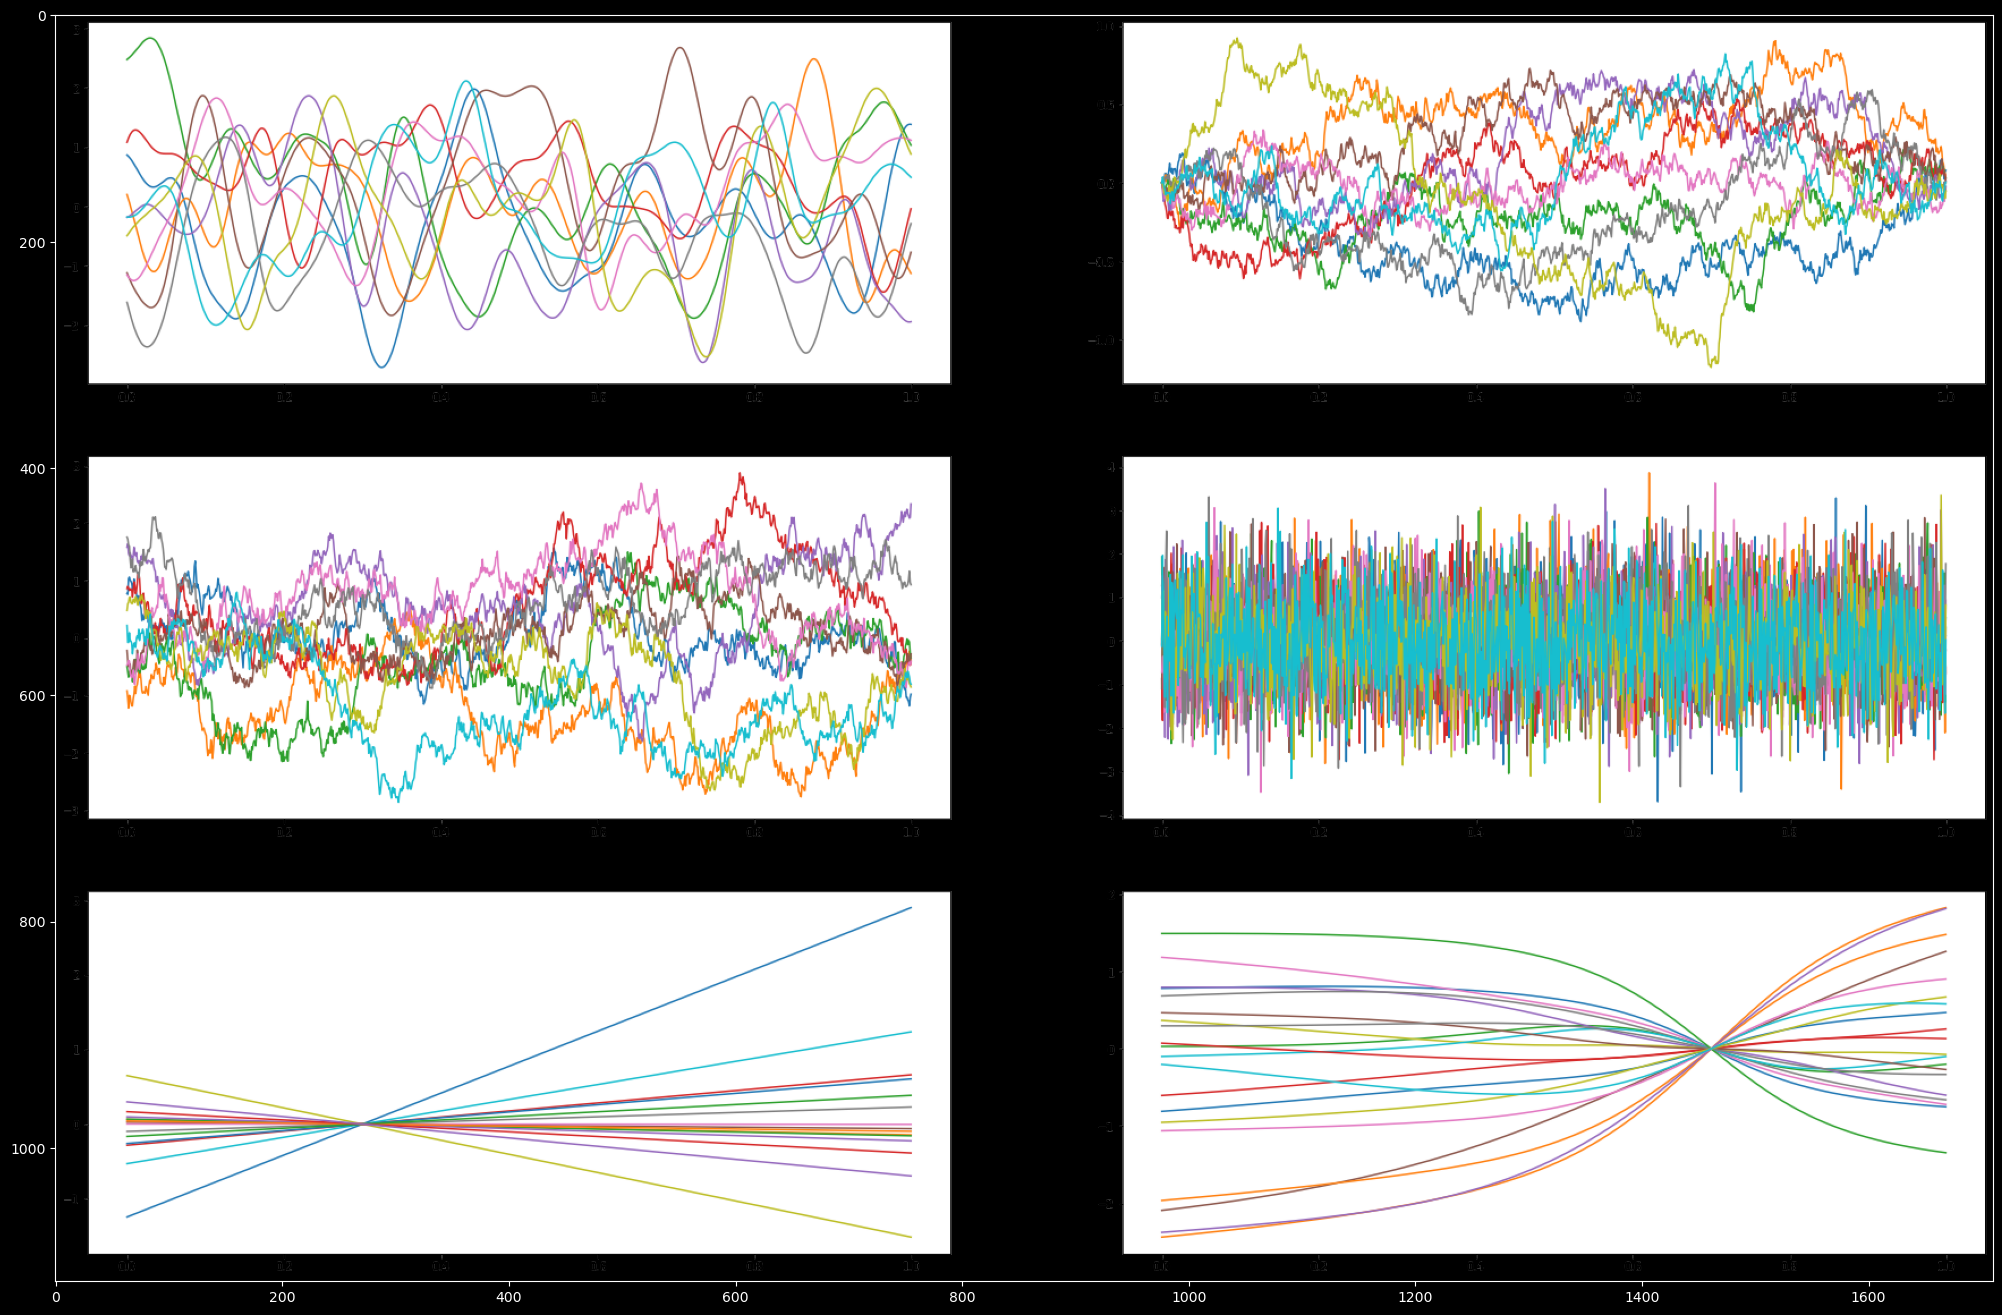

In [10]:
plt.figure(figsize=(25, 25))
plt.imshow(Image.open('gaussian.png'))

In [11]:
answers = np.array([[5, 6], [7, 2], [3, 1]])
np.save('gaussian_choice.npy', answers)


In [12]:
# # params
# dim = 100
# num_process = 10

# # define covariane matrix
# x1 = np.repeat(np.linspace(0, 1, dim).reshape(-1, 1), dim, axis=1)
# x2 = np.repeat(np.linspace(0, 1, dim).reshape(1, -1), dim, axis=0)
# cov_matrix = np.exp(-(np.abs(x1 - x2))/5)

# # define mean
# mean = np.zeros(dim)

# # # create gaussian processes
# process = np.random.multivariate_normal(mean, cov_matrix, size=num_process)

# # # plot processes
# plt.rc('figure', figsize=(8, 8), dpi=100)
# x_axis = np.linspace(0, 1, dim)
# for i in range(num_process):
#     plt.plot(x_axis, process[i, :], '--', linewidth=1)
# plt.plot(x_axis, mean, linewidth=5)
# plt.show()


# Inference

In this section you are given samples from a Gaussian process and are supposed to infer the value of the process in other points using the available samples.

The samples are available in 'gaussian_infer_samples.npy' as a $2\times 50$ array, first row are time values and second row are the process's values.

Samples are generated from a Gaussian process with constant mean $\mu=2$ and rbf kernel: 
$k(s, t) = e^{\frac{-(s-t)^2}{\sigma^2}}$ with $\sigma^2=0.01$ plus a white noise with variance $\delta^2=0.01$.

1. Estimate process value at all points from 0 to 10 with step 0.01.
2. Store the estimated values in a numpy array (in the same form as samples) and save them as 'gaussian_infer_result.npy'
3. Plot the inferred Gaussian process as well as the input samples

In [49]:
def cov_fn(s, t, sigma2):
    return np.exp(-(np.subtract.outer(s, t) ** 2)/sigma2)


def predictive(x, data, sigma2):
    # print(data.shape)
    k_x_data = cov_fn(x, data[0, :], sigma2)
    K_data_data_inv = np.linalg.inv(cov_fn(data[0, :], data[0, :], sigma2) + 0.01 * np.eye(data.shape[1]))
    mu = k_x_data @ K_data_data_inv @ data[1, :]
    k_x_x = cov_fn(x, x, sigma2)
    variance = k_x_x - k_x_data @ K_data_data_inv @ k_x_data
    return mu, variance


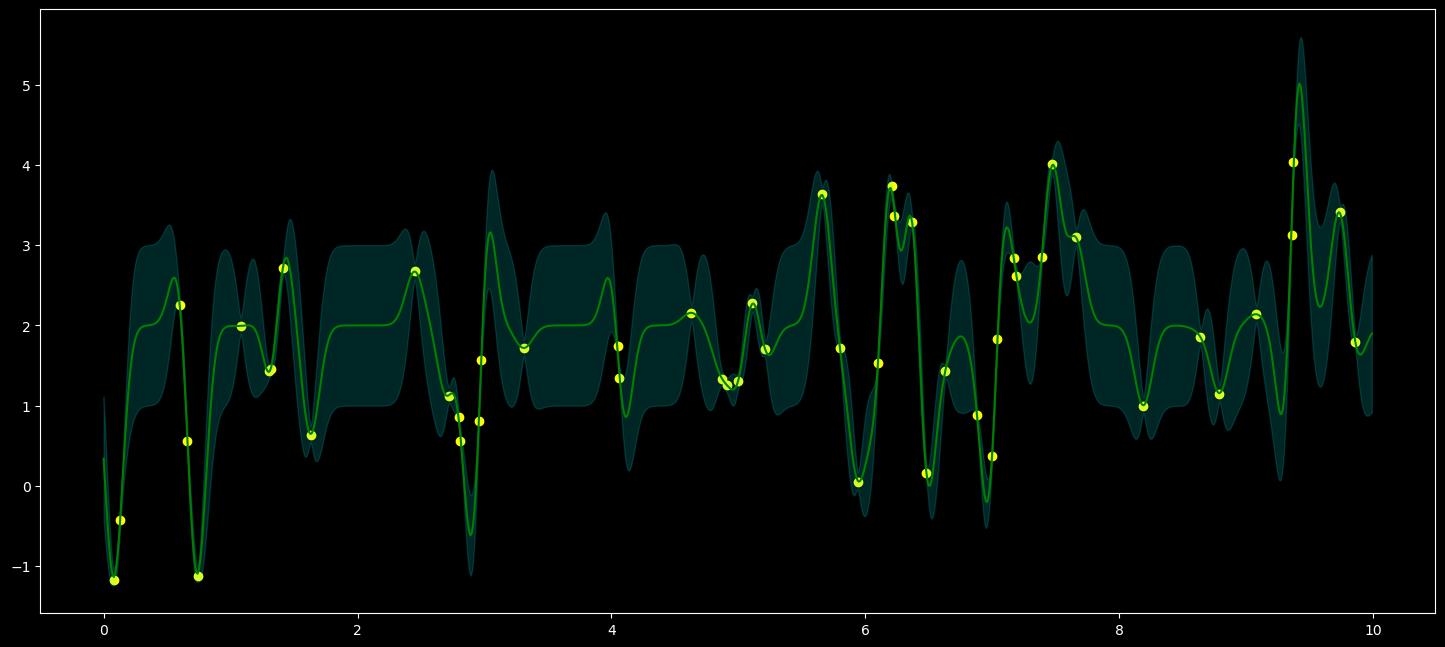

In [59]:
data = np.load('gaussian_infer_samples.npy')
plt.scatter(data[0, :], data[1, :], c='yellow')

data[1, :] = data[1, :] - 2

xaxis = np.arange(0, 10, 0.01)

mus, stds = [], []

for x in xaxis:
    mu, variance = predictive(x, data, 0.01)
    mus.append(mu)
    stds.append(variance ** 0.5)

upper = [2 + mus[i] + stds[i] for i in range(len(mus))]
lower = [2 + mus[i] - stds[i] for i in range(len(mus))]
mean = [2 + mus[i] for i in range(len(mus))]
plt.rc('figure', figsize=(18, 8), dpi=100)
plt.fill_between(xaxis, lower, upper, color='cyan', alpha=0.15, label='$2\sigma_{2|1}$')
plt.plot(xaxis, mean, c='green')
# plt.plot(xaxis, upper, '--')
# plt.plot(xaxis, lower, '--')
